# Random Forest - Fraud Check

In [1]:
# Author : Shreyas Shashikant Vaishnav
# Purpose : Random Forest
# Dataset : Fraud_Check_Dataset

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
fraud = pd.read_csv(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Random Forest\Fraud_check.csv")

In [4]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud.shape

(600, 6)

In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [9]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
# Start exploring the dataset
print(fraud.columns)

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

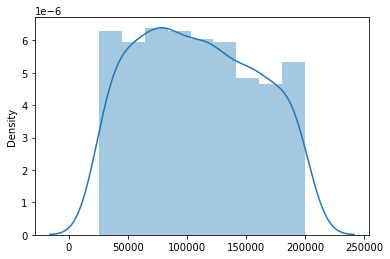

In [15]:
# distribution of Amount
import seaborn as sns
amount = [fraud['City.Population'].values]
sns.distplot(amount)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

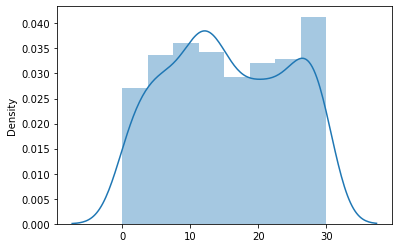

In [16]:
amount = [fraud['Work.Experience'].values]
sns.distplot(amount)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Shreyas Vaishnav\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Shreyas Vaishnav\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


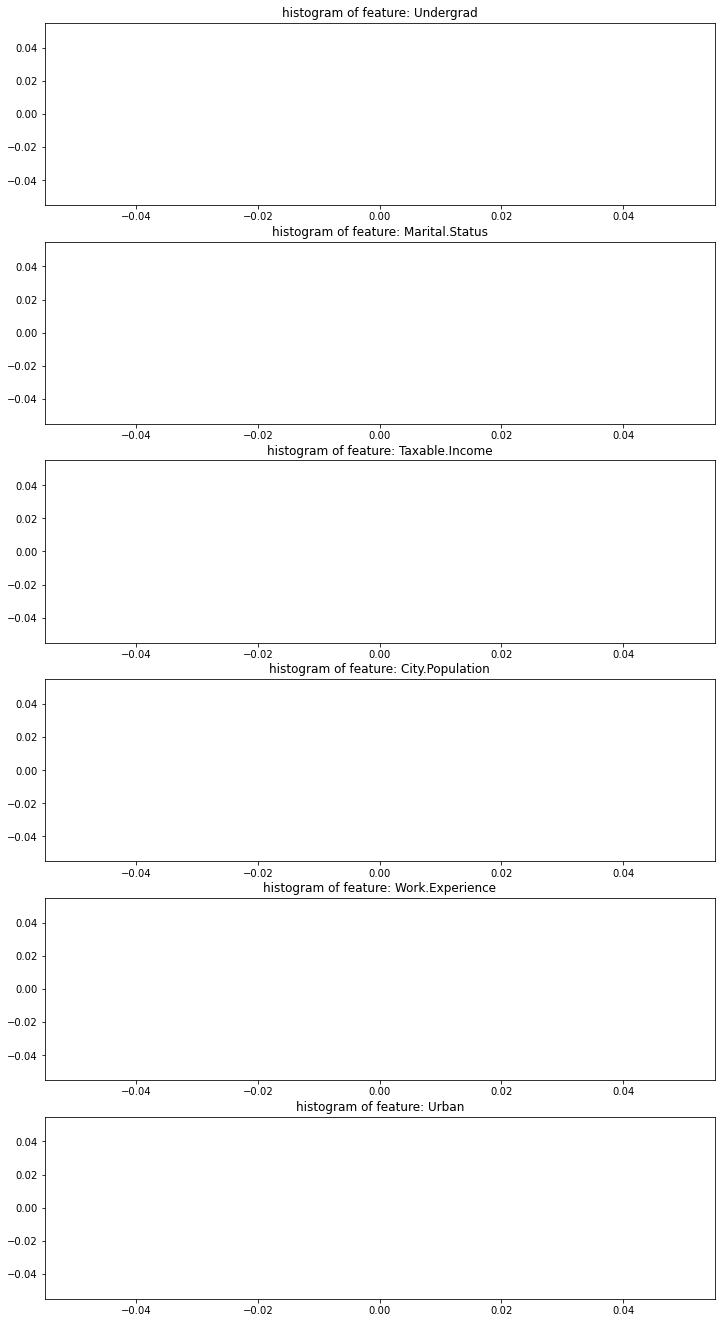

In [17]:
from matplotlib import gridspec
# distribution of anomalous features
features = fraud.iloc[:,0:28].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(fraud[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(fraud[c][fraud.Undergrad == 1], bins=50)
    sns.distplot(fraud[c][fraud.Undergrad == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()



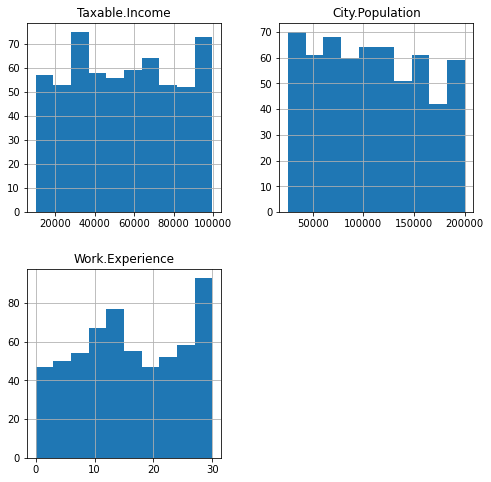

In [18]:
# Plot histograms of each parameter 
fraud.hist(figsize = (8, 8))
plt.show()

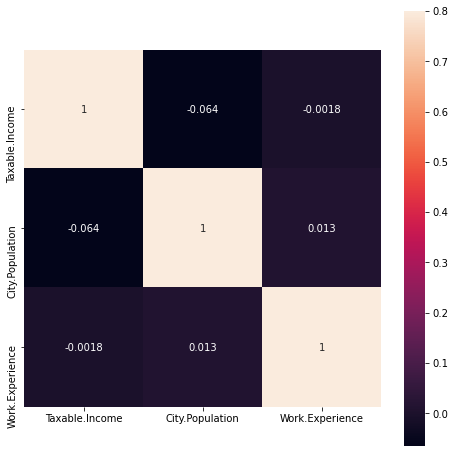

In [19]:
# Correlation matrix
c = fraud.corr()
fig = plt.figure(figsize = (8, 8))

sns.heatmap(c, vmax = .8, square = True , annot = True)
plt.show()

In [20]:
# Renaming the columns of the data and making changes in the original data

fraud.rename({'Undergrad':'UG','Marital.Status':'MS', 'Taxable.Income':'TI', 'City.Population':'CP', 'Work.Experience':'WE'}, axis = 1, inplace = True)

In [21]:
fraud.head()

,UG,MS,TI,CP,WE,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [22]:
# Categorizing the tax column according to the condition

fraud['TI'] = fraud.TI.map(lambda taxable_income : 'Risky' if taxable_income <= 30000 else 'Good')

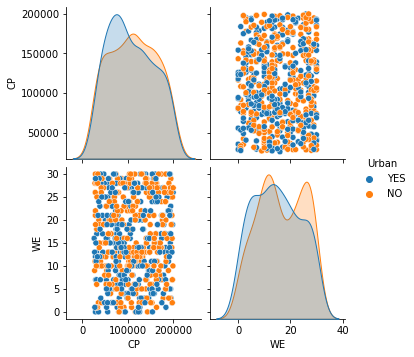

In [23]:
sns.pairplot(fraud, hue ='Urban')
# to show
plt.show()

In [24]:
# Converting the categorical columns to proper datatypes

fraud['UG'] = fraud['UG'].astype("category")
fraud['MS'] = fraud['MS'].astype("category")
fraud['Urban'] = fraud['Urban'].astype("category")
fraud['TI'] = fraud['TI'].astype("category")

In [25]:
fraud.dtypes

UG       category
MS       category
TI       category
CP          int64
WE          int64
Urban    category
dtype: object

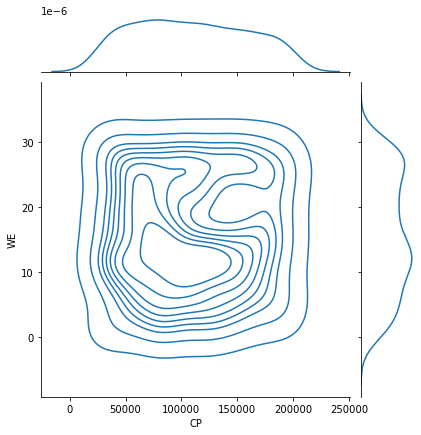

In [26]:
sns.jointplot(x ='CP', y ='WE', data = fraud, kind ='kde');

In [27]:
# Encoding the categorical columns by using label encoder

label_encoder = preprocessing.LabelEncoder()
fraud['UG'] = label_encoder.fit_transform(fraud['UG'])
fraud['MS'] = label_encoder.fit_transform(fraud['MS'])
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])
fraud['TI'] = label_encoder.fit_transform(fraud['TI'])

In [28]:
fraud.head()

,UG,MS,TI,CP,WE,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping 

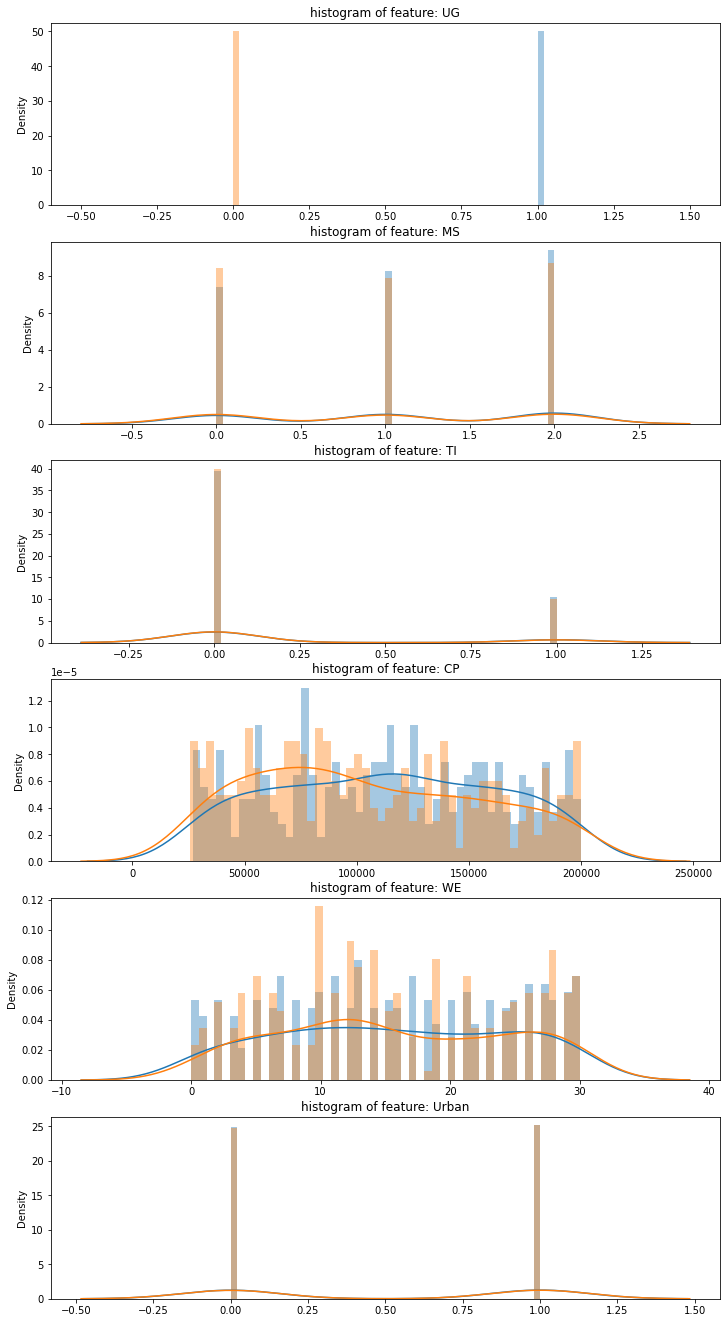

In [30]:
from matplotlib import gridspec
# distribution of anomalous features
features = fraud.iloc[:,0:28].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(fraud[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(fraud[c][fraud.UG == 1], bins=50)
    sns.distplot(fraud[c][fraud.UG == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show();

In [31]:
fraud['TI'].unique()

array([0, 1])

In [32]:
fraud['TI'].value_counts()

0    476
1    124
Name: TI, dtype: int64

In [33]:
# Splitting the data into x and y as input and output

X = fraud.iloc[:,[0,1,3,4,5]]
Y = fraud.iloc[:,2]

In [34]:
X.head()

,UG,MS,CP,WE,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [35]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: TI, dtype: int32

In [36]:
# Splitting the data into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=3, oob_score = True, n_estimators=15, max_features=4, criterion="entropy")

In [38]:
rf.fit(x_train,y_train) # Fitting RandomForestClassifier model from sklearn.ensemble 
rf.estimators_ # 
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels 
rf.n_features_  # Number of input features in model 8 here.

rf.n_outputs_ # Number of outputs when fit performed

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


1

In [39]:
preds = rf.predict(x_test)
preds

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [40]:
pd.Series(preds).value_counts()

0    169
1     11
dtype: int64

In [41]:
crosstable = pd.crosstab(preds,y_test)
crosstable

TI,0,1
row_0,,
0,129,40
1,9,2


In [43]:
print(np.mean(preds == y_test) *100)

72.77777777777777


In [45]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       169
           1       0.05      0.18      0.08        11

    accuracy                           0.73       180
   macro avg       0.49      0.47      0.46       180
weighted avg       0.88      0.73      0.79       180



In [47]:
#seperating the X and the Y from the dataset
X = fraud.drop(['TI'], axis=1)
Y = fraud["TI"]
print(X.shape)
print(Y.shape)

#getting just the values for the sake of processing (its a numpy array with no columns)
X_data = X.values
Y_data = Y.values

(600, 5)
(600,)


In [48]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [50]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
# predictions
y_pred = rfc.predict(X_test)

In [51]:
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != Y_test).sum()

In [57]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

#evaluation of the model
#printing every score of the classifier
#scoring in any thing

from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
print("the Model used is {}".format("Isolation Forest"))
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is {}".format(acc*100))
#prec= precision_score(Y_test,y_pred)
#print("The precision is {}".format(prec))
#rec= recall_score(Y_test,y_pred)
#print("The recall is {}".format(rec))
#f1= f1_score(Y_test,y_pred)
#print("The F1-Score is {}".format(f1))
#MCC=matthews_corrcoef(Y_test,y_pred)
#print("The Matthews correlation coefficient is{}".format(MCC))

the Model used is Isolation Forest
The accuracy is 78.33333333333333


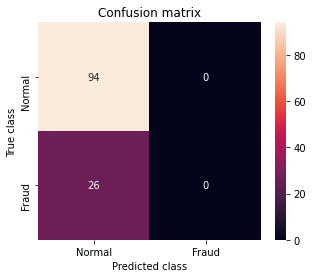

In [60]:

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [63]:
# Run classification metrics
print('{}: {}'.format("Isolation Forest", n_errors))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Isolation Forest: 26
0.7833333333333333
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
